In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df[['job_title_short','job_skills']].head()


,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [13]:
df_exploded=df.explode('job_skills')

<Axes: xlabel='job_skills'>

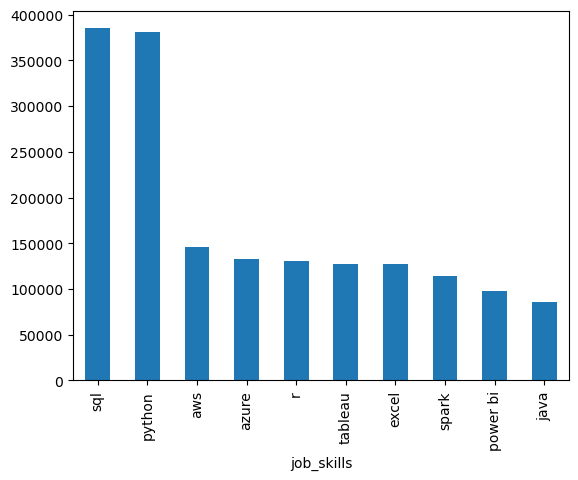

In [16]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [21]:
skills_count=df_exploded.groupby(['job_title_short','job_skills']).size()

type(skills_count)

pandas.core.series.Series

In [31]:
#converting into dataframe

df_skills_count=skills_count.reset_index(name='skill_count')

df_skills_count=df_skills_count.sort_values(by='skill_count',ascending=False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
45,Business Analyst,digitalocean,1
2241,Software Engineer,visualbasic,1
29,Business Analyst,codecommit,1
24,Business Analyst,chainer,1


<Axes: ylabel='job_skills'>

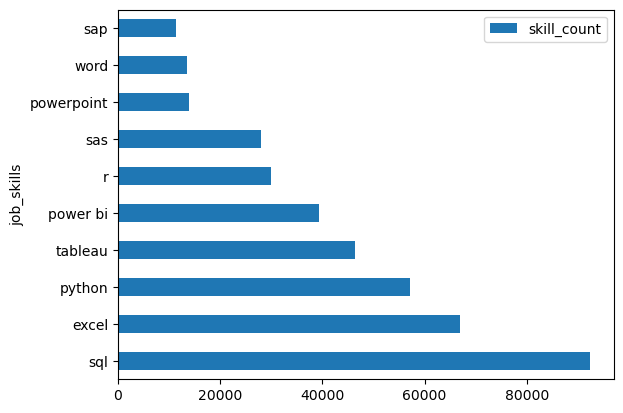

In [37]:
job_title='Data Analyst'
top_skills=10


df_skills_final=df_skills_count[df_skills_count['job_title_short']== job_title].head(10)
df_skills_final

df_skills_final.plot(kind='barh',x='job_skills', y='skill_count')              # we have to specify the x and y values

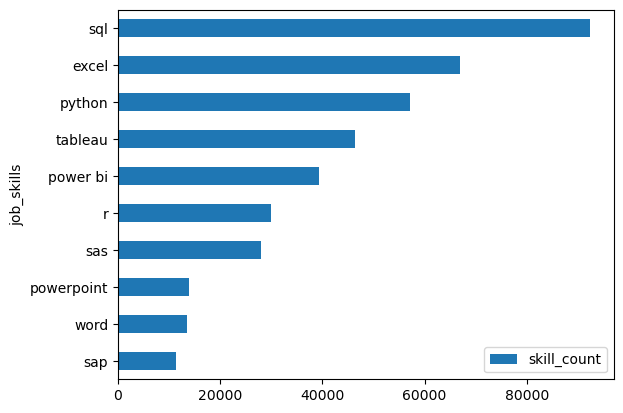

In [40]:
df_skills_final.plot(kind='barh',x='job_skills', y='skill_count')  
plt.gca().invert_yaxis()

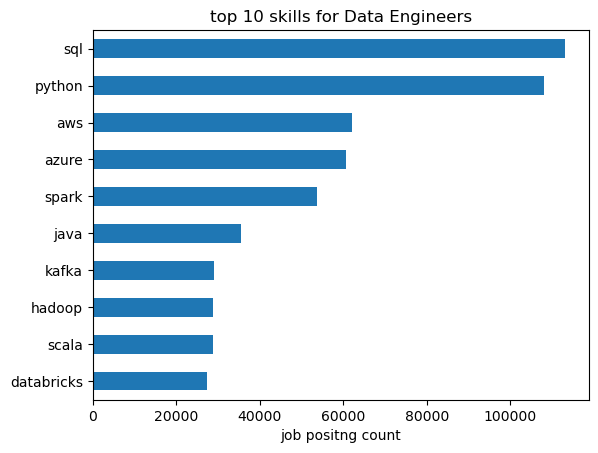

In [44]:
job_title='Data Engineer'
top_skills=10


df_skills_final=df_skills_count[df_skills_count['job_title_short']== job_title].head(10)
df_skills_final

df_skills_final.plot(kind='barh',x='job_skills', y='skill_count')   


plt.gca().invert_yaxis()       


plt.title(f'top {top_skills} skills for {job_title}s')
plt.xlabel('job positng count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()